In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
X=df.iloc[:, 0:3].values
y=df.iloc[:,-1].values

y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

In [ ]:
#splitting the model into train and test for Ridge and polynomial

Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)



RMSE:  1.516151937599388
CV:  0.8613783513634226


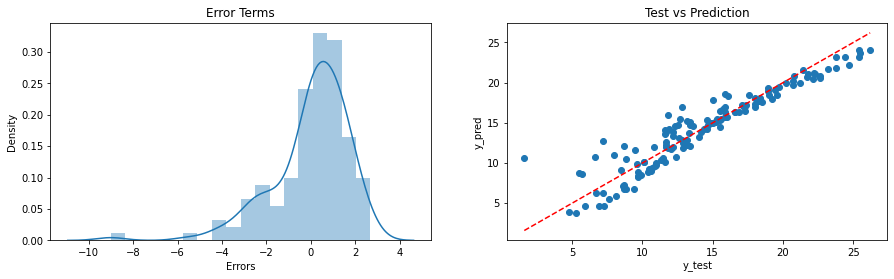

In [ ]:
XS_train, XS_test, ys_train, ys_test = train_test_split(X, y, test_size=0.3, random_state=101)

#fitting linear regresison model
lin_reg = LinearRegression()
lin_reg.fit(XS_train, ys_train)
LinearYhat=lin_reg.predict(XS_test)

#error of linear regression model
cv_linear = cross_val_score(estimator = lin_reg, X = XS_train, y = ys_train, cv = 9)
y_pred_linear_train = lin_reg.predict(XS_train)
MAE_linear = mean_absolute_error(ys_test,LinearYhat)
MSE_linear = mean_squared_error(ys_test,LinearYhat)
RMSE_linear = (np.sqrt(mean_squared_error(ys_test, LinearYhat)))
print("RMSE: ", RMSE_linear)
print("CV: ", cv_linear.mean())

#Modeling linear Regression

plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
sns.distplot((ys_train - y_pred_linear_train))
plt.title('Error Terms')
plt.xlabel('Errors')
plt.subplot(1,2,2)
plt.scatter(ys_train,y_pred_linear_train)
plt.plot([ys_train.min(),ys_train.max()],[ys_train.min(),ys_train.max()], 'r--')
plt.title('Test vs Prediction')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [ ]:
#fitting polynomial regression model
Trr=[]; Tss=[]
degree=10

for i in range(1,degree):
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X)
    X_poly1 = poly_reg.fit_transform(Test_X)
    lin_reg.fit(X_poly, Train_Y)

    pred1 = lin_reg.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))

    pred2 = lin_reg.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

Tss
# The degree 4 is the optimal degree as it has the min MSE as shown in the array




[1.316545776485107,
 0.4518200834190417,
 0.4379771893795695,
 0.3979478260710522,
 0.4205069829073784,
 0.8958490430683388,
 5.015953143246348,
 63.52392846422489,
 231.72409645317043]

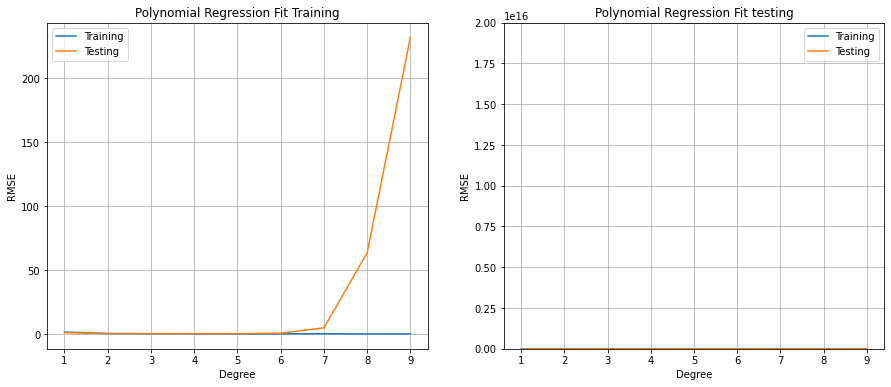

In [ ]:
# we first tried visualizing with these ranges but it wasnt clear so we made another plot widening the range and it turned out to be 4

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(1,degree),Trr, label='Training')
plt.plot(range(1,degree),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit Training')
#plt.ylim([0,15])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(1,degree),Trr, label='Training')
plt.plot(range(1,degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit testing')
plt.ylim([0,2e16])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()


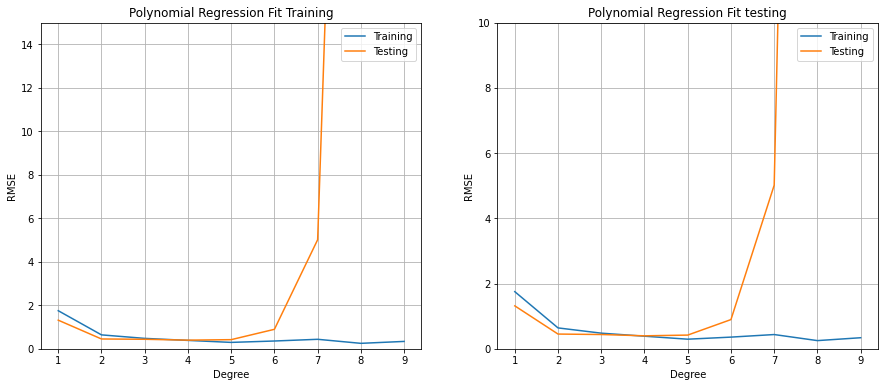

In [ ]:
#This is the visible plot that shows the intercepted part between error and degree

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(1,degree),Trr, label='Training')
plt.plot(range(1,degree),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit Training')
plt.ylim([0,15])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(1,degree),Trr, label='Training')
plt.plot(range(1,degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit testing')
plt.ylim([0,10])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()


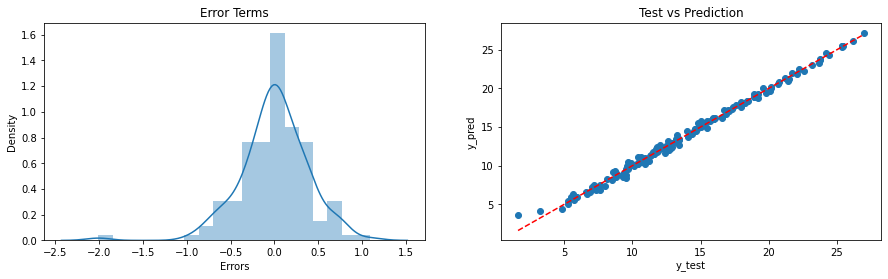

In [ ]:
#Modelling polynomial regression with the optimal degree 4

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(Train_X)
X_poly1 = poly_reg.fit_transform(Test_X)
lin_reg.fit(X_poly, Train_Y)
pred1 = lin_reg.predict(X_poly)
pred2 = lin_reg.predict(X_poly1)

#Train_X, Test_X, Train_Y, Test_Y

MAE_poly = mean_absolute_error(Test_Y,pred2)
MSE_poly = mean_squared_error(Test_Y,pred2)
RMSE_poly = np.sqrt(MSE_poly)


plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.distplot((Train_Y - pred1))
plt.title('Error Terms')
plt.xlabel('Errors')
plt.subplot(1,2,2)
plt.scatter(Train_Y,pred1)
plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
plt.title('Test vs Prediction')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()


1.3165472704443149
[0.04558639 0.18569753 0.00223297]
0.07783896626902258


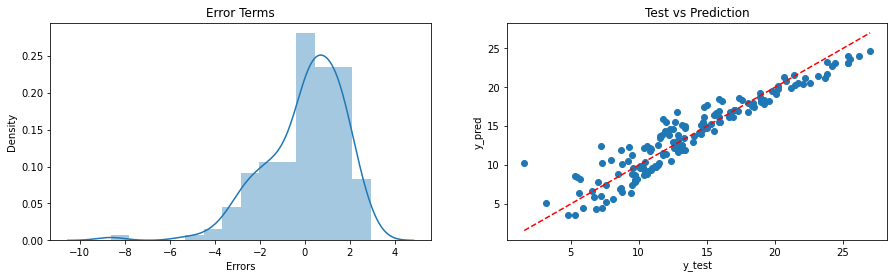

In [ ]:
#creating the ridge reg model & calculating error for ridge regresison model using rmse
ridge_cv = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')
RLR = ridge_cv.fit(Train_X,Train_Y)
predRidge1 = RLR.predict(Train_X)
predRidge2 = RLR.predict(Test_X)

ridge_cv.coef_
test_predictions = ridge_cv.predict(Test_X)
MAERidge = mean_absolute_error(Test_Y,test_predictions)
MSERidge = mean_squared_error(Test_Y,test_predictions)
RMSERidge = np.sqrt(MSERidge)
print(RMSERidge)
print(ridge_cv.coef_)
#average of alphas of cv
print(np.mean(ridge_cv.coef_))
cv_RidgeMean=np.mean(ridge_cv.coef_)
plt.figure(figsize=[15,4])


plt.subplot(1,2,1)
sns.distplot((Train_Y - predRidge1))
plt.title('Error Terms')
plt.xlabel('Errors')
plt.subplot(1,2,2)
plt.scatter(Train_Y,predRidge1)
plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
plt.title('Test vs Prediction')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()


In [ ]:
#comparing linear and polynomial regression usinv cross validatin and rmse



models = [('Linear Regression', RMSE_linear,MSE_linear,MAE_linear, cv_linear.mean()),
          ('Ridge Regression', RMSERidge,MSERidge,MAERidge, cv_RidgeMean),
          ('Polynomial Regression',RMSE_poly,MSE_poly,MAE_poly)

         ]
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE','MSE','MAE','Cross-Validation'])
predict

,Model,RMSE,MSE,MAE,Cross-Validation
0,Linear Regression,1.516152,2.298717,1.213746,0.861378
1,Ridge Regression,1.316547,1.733297,1.027170,0.077839
2,Polynomial Regression,0.397948,0.158362,0.326036,NaN


In [ ]:
#Ridge Regression Model is the idealistic Model as it has the least RMSE when compared to Linear and Polynomial Regression
#Polynomial seems like the better option but it is overfitted, so we had to use Ridge to generalize it more

In [ ]:
#Saving the models
from joblib import dump, load

dump(ridge_cv, 'optimal_polyreg_model.joblib')

['optimal_polyreg_model.joblib']

In [ ]:
Load_Reg=load('optimal_polyreg_model.joblib')
campaign=[[149,22,12]]
#campaign_reg=Load_Reg.transform(campaign)
ridge_cv.predict(campaign)


array([13.72179896])